In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [5]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [7]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [9]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2008_2012.dtypes


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_25544\4037234991.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

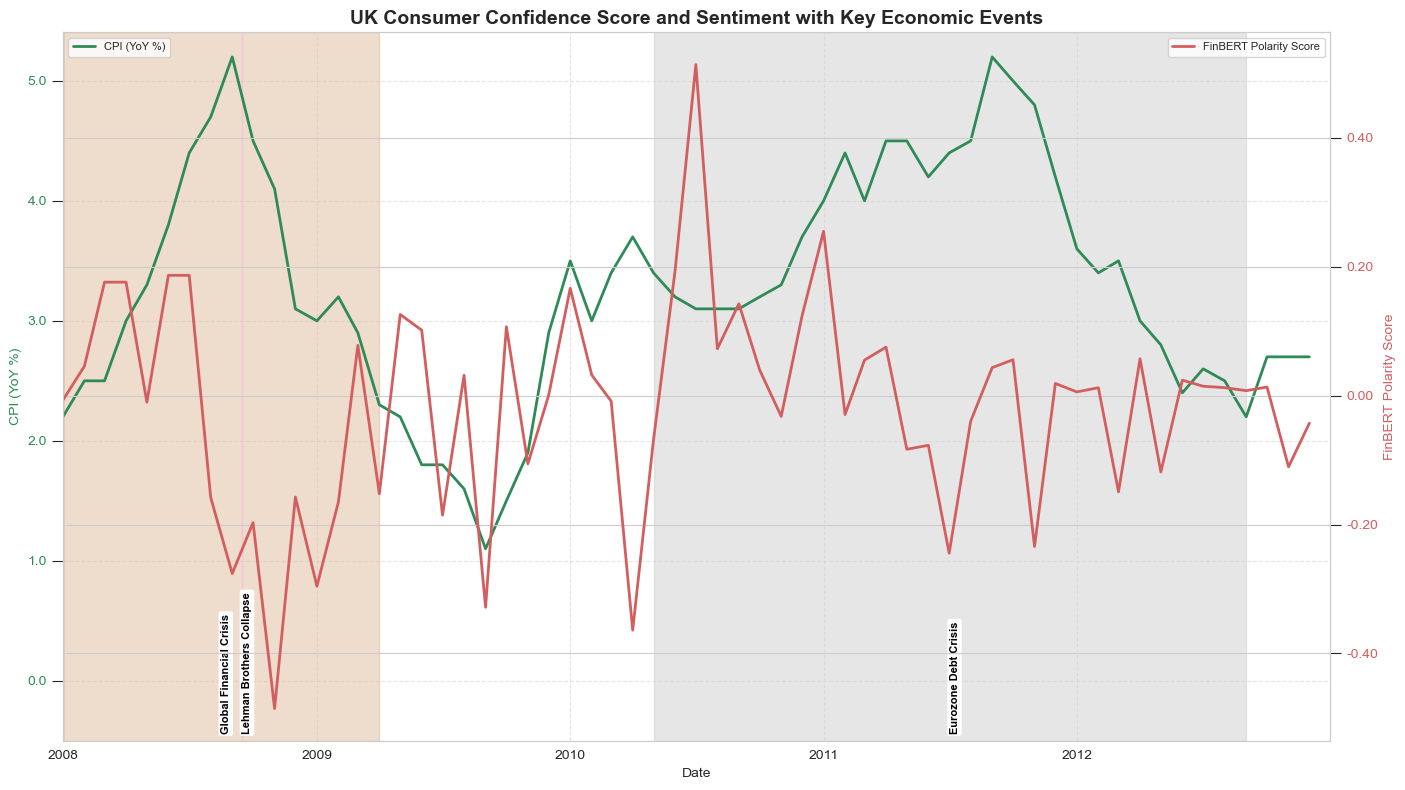

In [13]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('CPI (YoY %)', color=color_cpi, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['CPI'], color=color_cpi, label='CPI (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK Consumer Confidence Score and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

#### From 2008 to 2012, the Consumer Confidence Score (green line) dropped sharply during the Global Financial Crisis, showing a fall in public confidence. It then slowly recovered but remained unstable during the Eurozone Debt Crisis. The FinBERT sentiment score (red line) also turned negative in both crisis periods, reflecting a pessimistic tone in financial speeches. While consumer confidence showed some signs of recovery, the overall sentiment remained cautious.

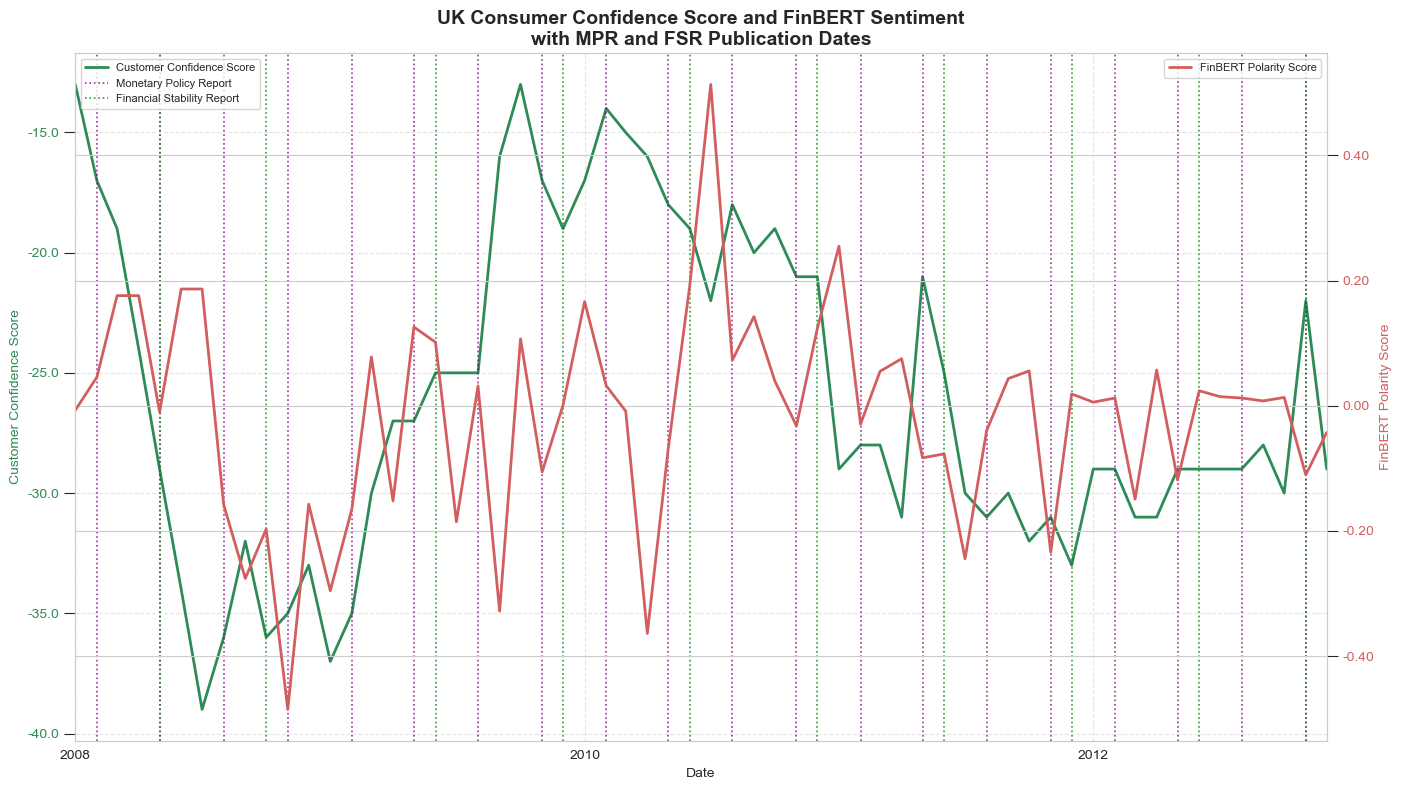

In [16]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Customer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Customer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

#### Drop unncessary columns to reduce the number of variables to be explored

In [19]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [21]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [23]:
# Define the new order of the columns
new_column_order = [
    'Date', 'confidence_score', 'finbert_sentiment_score', 'CPI_pct_change',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,-13.0,-0.007201,2.2,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,-17.0,0.045560,2.5,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,-19.0,0.175849,2.5,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,-24.0,0.175849,3.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,-29.0,-0.010290,3.3,5.4,4.7,-0.5,5657.73,4.916667,164.014
